Correlation Visualization

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
df_vaccinations = pd.read_csv("./../Data/Final_Datasets/country_vaccinations.csv")
df_vaccinations

,Unnamed: 0.1,Unnamed: 0,iso_code,FIRST_VACCINE_DATE,days_since_first_vac,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,0,0,ABW,2021-02-17,40.0,Aruba,2021-03-29,25766.0,15600.0,10166.0,0.0,0.0,24.04,14.55,9.48,0.0,Pfizer/BioNTech,Government of Aruba,https://www.government.aw
1,1,1,ABW,2021-02-17,41.0,Aruba,2021-03-30,27044.0,15600.0,10166.0,0.0,1278.0,24.04,14.55,9.48,11922.0,Pfizer/BioNTech,Government of Aruba,https://www.government.aw
2,2,2,ABW,2021-02-17,42.0,Aruba,2021-03-31,28322.0,15600.0,10166.0,0.0,1278.0,24.04,14.55,9.48,11922.0,Pfizer/BioNTech,Government of Aruba,https://www.government.aw
3,3,3,ABW,2021-02-17,43.0,Aruba,2021-04-01,29600.0,15600.0,10166.0,0.0,1278.0,24.04,14.55,9.48,11922.0,Pfizer/BioNTech,Government of Aruba,https://www.government.aw
4,4,4,ABW,2021-02-17,44.0,Aruba,2021-04-02,30878.0,15600.0,10166.0,0.0,1278.0,24.04,14.55,9.48,11922.0,Pfizer/BioNTech,Government of Aruba,https://www.government.aw
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82138,82138,82138,WSM,2021-04-18,333.0,Samoa,2022-03-17,298099.0,145989.0,130289.0,0.0,1022.0,138.04,72.94,65.10,5106.0,Oxford/AstraZeneca,SPC Public Health Division,https://stats.pacificdata.org/vis?tm=covid&pg=...
82139,82139,82139,WSM,2021-04-18,334.0,Samoa,2022-03-18,299121.0,145989.0,130289.0,0.0,1022.0,138.04,72.94,65.10,5106.0,Oxford/AstraZeneca,SPC Public Health Division,https://stats.pacificdata.org/vis?tm=covid&pg=...
82140,82140,82140,WSM,2021-04-18,335.0,Samoa,2022-03-19,300143.0,145989.0,130289.0,0.0,1022.0,138.04,72.94,65.10,5106.0,Oxford/AstraZeneca,SPC Public Health Division,https://stats.pacificdata.org/vis?tm=covid&pg=...
82141,82141,82141,WSM,2021-04-18,336.0,Samoa,2022-03-20,301165.0,145989.0,130289.0,0.0,1022.0,138.04,72.94,65.10,5106.0,Oxford/AstraZeneca,SPC Public Health Division,https://stats.pacificdata.org/vis?tm=covid&pg=...


In [3]:
df_cases = pd.read_csv("./../Data/Final_Datasets/country_death_case.csv")
df_cases

,Unnamed: 0.1,Unnamed: 0,iso_code,FIRST_VACCINE_DATE,Date_reported,days_since_first_vac,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,0,0,ABW,2021-02-17,2020-01-04,-410.0,Aruba,AMR,0.0,0,0.0,0
1,1,1,ABW,2021-02-17,2020-01-05,-409.0,Aruba,AMR,0.0,0,0.0,0
2,2,2,ABW,2021-02-17,2020-01-06,-408.0,Aruba,AMR,0.0,0,0.0,0
3,3,3,ABW,2021-02-17,2020-01-07,-407.0,Aruba,AMR,0.0,0,0.0,0
4,4,4,ABW,2021-02-17,2020-01-08,-406.0,Aruba,AMR,0.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
356863,356863,356863,WSM,2021-04-18,2024-09-18,1249.0,Samoa,WPR,0.0,17057,0.0,31
356864,356864,356864,WSM,2021-04-18,2024-09-19,1250.0,Samoa,WPR,0.0,17057,0.0,31
356865,356865,356865,WSM,2021-04-18,2024-09-20,1251.0,Samoa,WPR,0.0,17057,0.0,31
356866,356866,356866,WSM,2021-04-18,2024-09-21,1252.0,Samoa,WPR,0.0,17057,0.0,31


In [44]:
df_US_cases = df_cases[df_cases["Country"] == "United States of America"]
# print("First Date")
# print(df_US_cases.iloc[0])
# print("Last Date")
df_US_vac = df_vaccinations[df_vaccinations["country"] == "United States"]
# print("First Date")
# print(df_US_vac.iloc[0])
# print("Last Date")

period_start = df_US_vac.iloc[0]["date"]
print(period_start)
period_end = df_US_vac.iloc[len(df_US_vac) - 1]["date"]
print(period_end)

# trim the cases to the dates of the vaccinations
df_US_cases_trimed = df_US_cases[df_US_cases["Date_reported"] <= period_end]
df_US_cases_trimed = df_US_cases_trimed[df_US_cases_trimed["Date_reported"] >= period_start]
# print(df_US_cases_trimed)

2020-12-13
2022-03-28


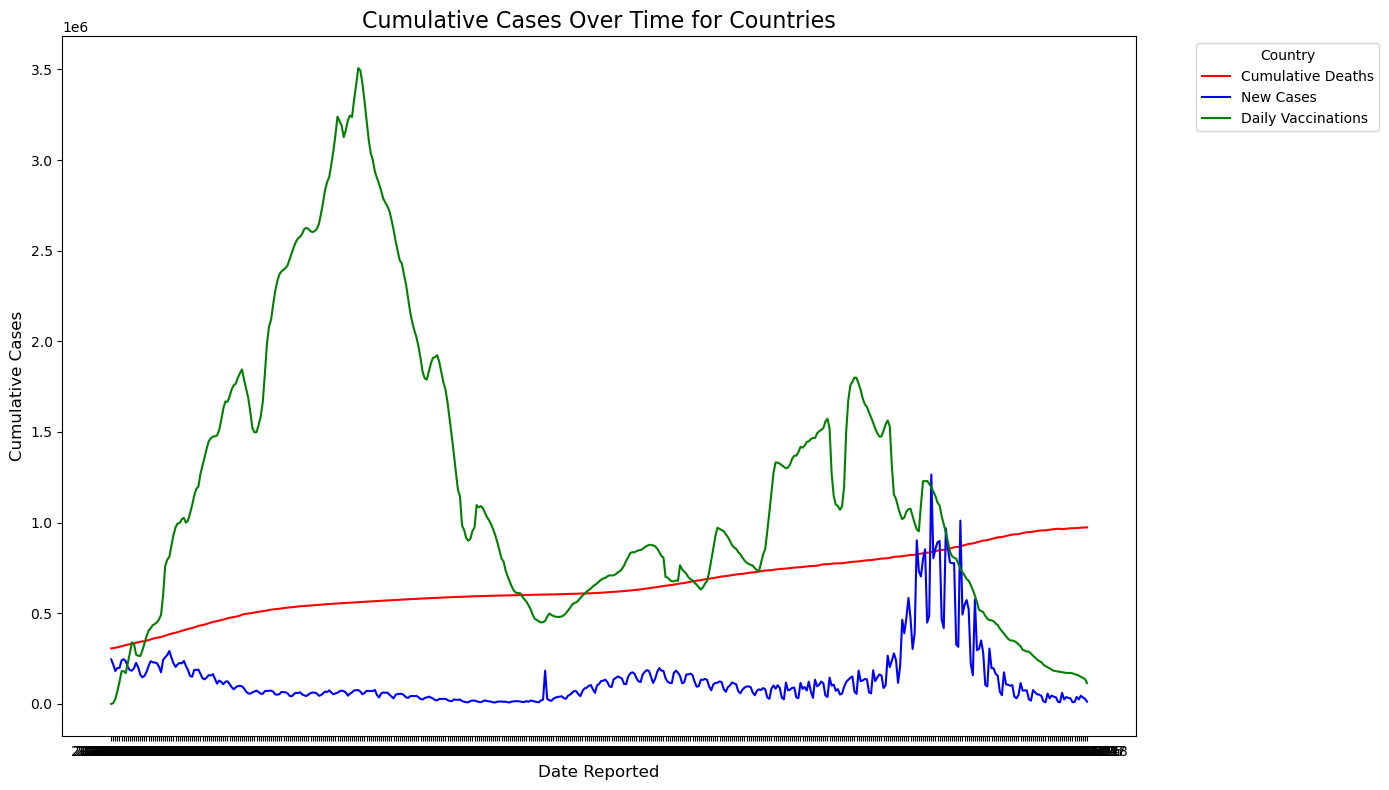

In [35]:
plt.figure(figsize=(14, 8))  

plt.plot(df_US_cases_trimed['Date_reported'], df_US_cases_trimed['Cumulative_deaths'], label="Cumulative Deaths", color="red")
plt.plot(df_US_cases_trimed['Date_reported'], df_US_cases_trimed['New_cases'], label="New Cases", color="blue")
plt.plot(df_US_cases_trimed['Date_reported'], df_US_vac['daily_vaccinations'], label="Daily Vaccinations", color="green")

plt.title(f'Cumulative Cases Over Time for Countries', fontsize=16)
plt.xlabel('Date Reported', fontsize=12)
plt.ylabel('Cumulative Cases', fontsize=12)

plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()

In [27]:
def generateCountryData(cases_country_name, vac_country_name):
    df_US_cases = df_cases[df_cases["Country"] == cases_country_name]
    df_US_vac = df_vaccinations[df_vaccinations["country"] == vac_country_name]

    period_start = df_US_vac.iloc[0]["date"]
    period_end = df_US_vac.iloc[len(df_US_vac) - 1]["date"]

    # trim the cases to the dates of the vaccinations
    df_US_cases_trimed = df_US_cases[df_US_cases["Date_reported"] <= period_end]
    df_US_cases_trimed = df_US_cases_trimed[df_US_cases_trimed["Date_reported"] >= period_start]
    
    return (df_US_cases_trimed, df_US_vac)

In [41]:
def displayCountryData(country_name, cases_df, vac_df):
    plt.figure(figsize=(14, 8))  

    plt.plot(cases_df['Date_reported'], cases_df['Cumulative_deaths'], label="Cumulative Deaths", color="red")
    plt.plot(cases_df['Date_reported'], cases_df['New_cases'], label="New Cases", color="blue")
    plt.plot(cases_df['Date_reported'], vac_df['daily_vaccinations'], label="Daily Vaccinations", color="green")
    plt.plot(cases_df['Date_reported'], cases_df['New_deaths'], label="New Deaths", color="black")

    plt.title(f'Cumulative Cases Over Time for {country_name}', fontsize=16)
    plt.xlabel('Date Reported', fontsize=12)
    plt.ylabel('Cumulative Cases', fontsize=12)

    plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    plt.tight_layout()
    plt.show()
    return

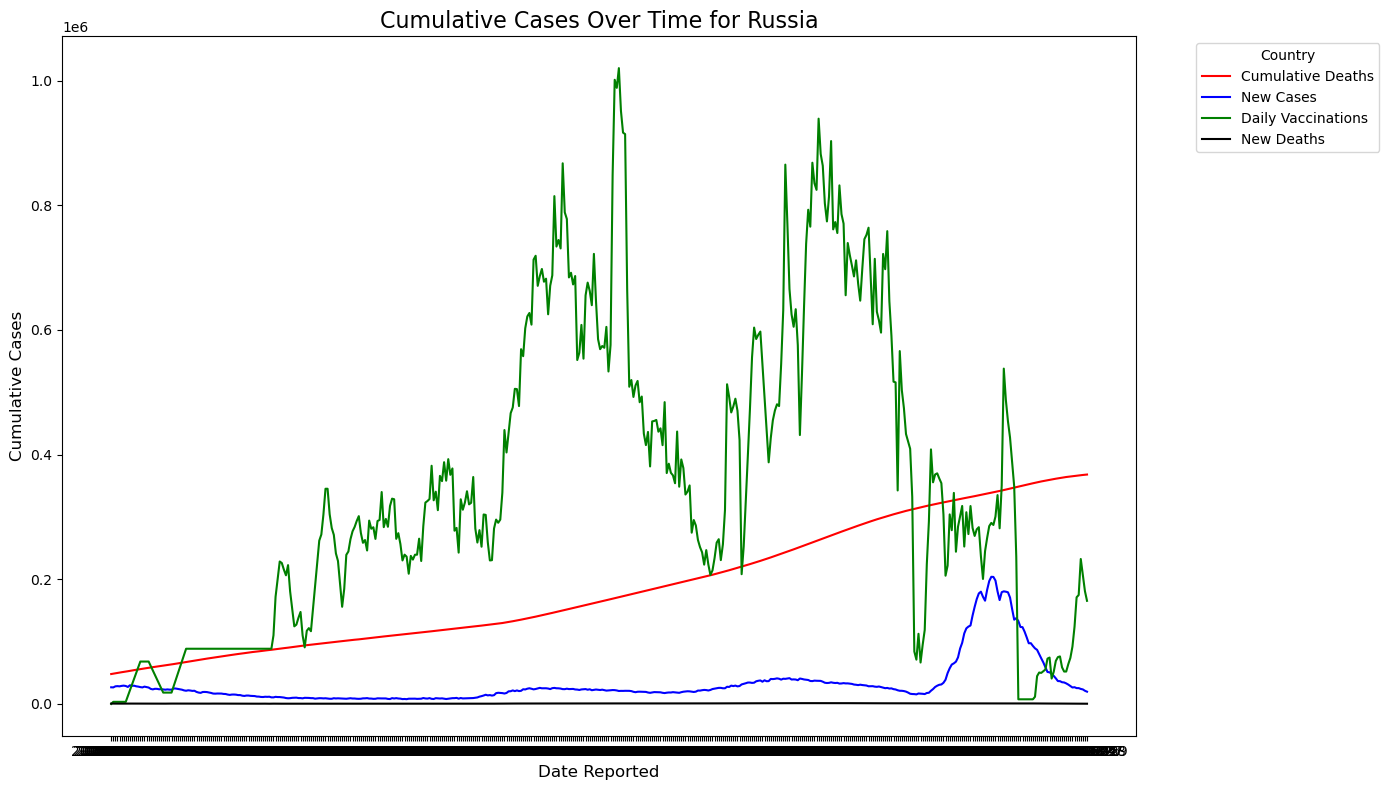

In [42]:
Russia_data = generateCountryData("Russian Federation", "Russia")
displayCountryData("Russia", Russia_data[0], Russia_data[1])

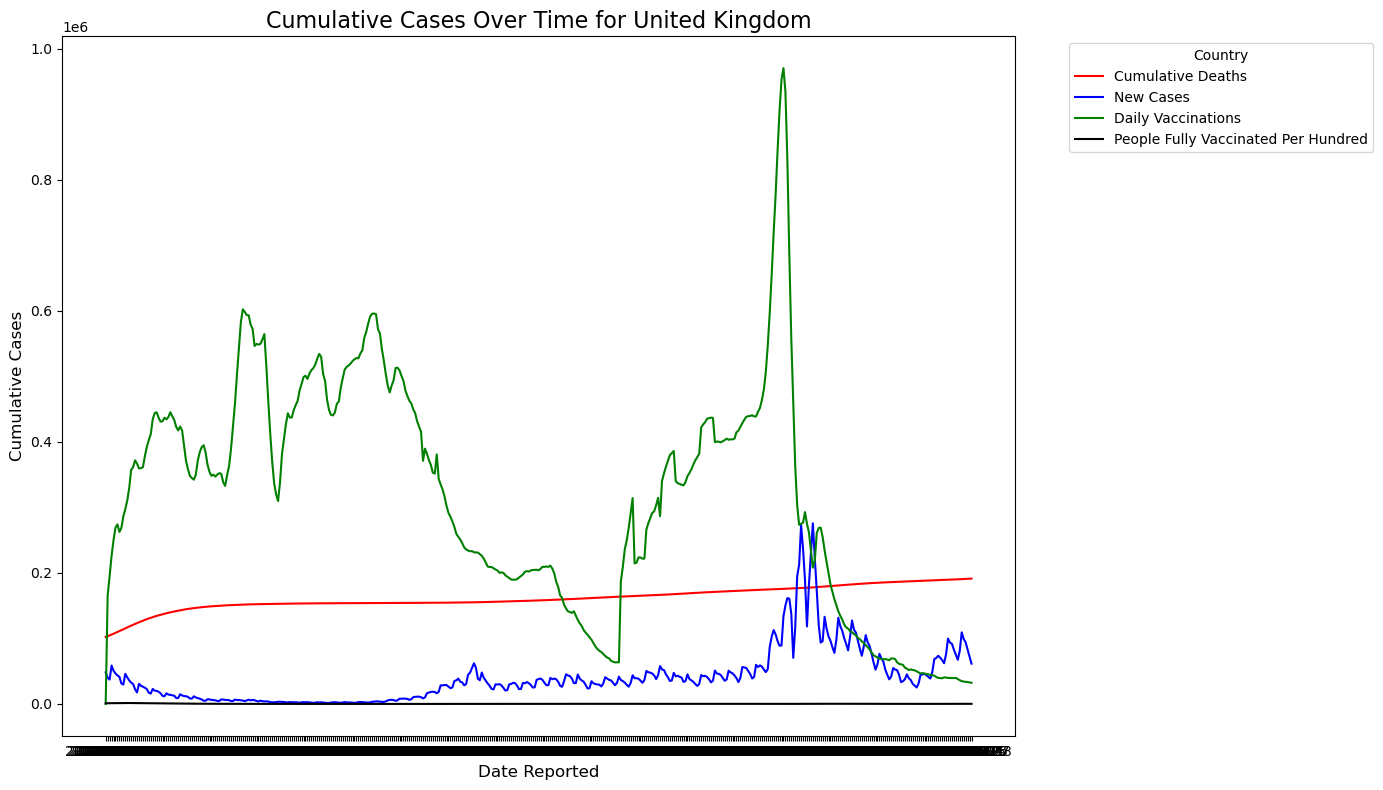

In [40]:
UK_data = generateCountryData("United Kingdom of Great Britain and Northern Ireland", "United Kingdom")
displayCountryData("United Kingdom", UK_data[0], UK_data[1])